In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
print(os.listdir())

['.ipynb_checkpoints', '2019_Accidentalidad.xlsx', '2020_Accidentalidad.xlsx', '2021_Accidentalidad.xlsx', '2022_Accidentalidad.xlsx', '2023_Accidentalidad.xlsx', 'da_market_data.csv', 'Enunciado.docx', 'List of Bidding Zone borders_2022_CORE.pdf', 'PracticaFinalR', 'Practica_Final.ipynb', '~$unciado.docx']


In [4]:
inform_2019 = pd.read_excel('2019_Accidentalidad.xlsx')
inform_2020 = pd.read_excel('2020_Accidentalidad.xlsx')
inform_2021 = pd.read_excel('2021_Accidentalidad.xlsx')
inform_2022 = pd.read_excel('2022_Accidentalidad.xlsx')
inform_2023 = pd.read_excel('2023_Accidentalidad.xlsx')
data_market = pd.read_csv('da_market_data.csv')

In [5]:
mergeDataSets = pd.concat([inform_2019, inform_2020, inform_2021, inform_2022, inform_2023], ignore_index = True, join= 'inner')

In [6]:
mergeDataSets

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,4.400680e+05,4.475679e+06,N,NaN
1,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,4.400680e+05,4.475679e+06,N,NaN
2,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,4.391396e+05,4.470837e+06,S,NaN
3,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,4.391396e+05,4.470837e+06,N,NaN
4,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,4.391396e+05,4.470837e+06,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212858,2023S033862,2023-10-31,13:00:00,AVDA. DOCTOR GARCIA TAPIA / GTA. JOSE ANTONIO ...,25,14.0,MORATALAZ,Colisión lateral,Nublado,Turismo,Conductor,De 65 a 69 años,Hombre,NaN,NaN,4.441659e+08,4.473885e+09,N,NaN
212859,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Furgoneta,Conductor,De 35 a 39 años,Hombre,NaN,NaN,4.461674e+08,4.479301e+09,N,NaN
212860,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 60 a 64 años,Mujer,NaN,NaN,4.461674e+08,4.479301e+09,N,NaN
212861,2023S033911,2023-10-31,19:45:00,PASEO. PRADO / COLPB. CARLOS V,48,1.0,CENTRO,Caída,Lluvia débil,VMU eléctrico,Conductor,De 25 a 29 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,4.412465e+08,4.473484e+09,N,NaN


Objetivo 1 --- cargar los informes en un dataframe --- Cantidad de filas totales: 212863

Objetivo 2 --- Borrar las columnas que hacen referencia a coordenadas

In [7]:
mergeDataSets = mergeDataSets.drop(['coordenada_x_utm', 'coordenada_y_utm'], axis=1)
mergeDataSets

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
1,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
2,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,S,NaN
3,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,N,NaN
4,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212858,2023S033862,2023-10-31,13:00:00,AVDA. DOCTOR GARCIA TAPIA / GTA. JOSE ANTONIO ...,25,14.0,MORATALAZ,Colisión lateral,Nublado,Turismo,Conductor,De 65 a 69 años,Hombre,NaN,NaN,N,NaN
212859,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Furgoneta,Conductor,De 35 a 39 años,Hombre,NaN,NaN,N,NaN
212860,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 60 a 64 años,Mujer,NaN,NaN,N,NaN
212861,2023S033911,2023-10-31,19:45:00,PASEO. PRADO / COLPB. CARLOS V,48,1.0,CENTRO,Caída,Lluvia débil,VMU eléctrico,Conductor,De 25 a 29 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,N,NaN


In [8]:
count_vehicles = mergeDataSets['tipo_vehiculo'].value_counts()

print("Conteo de valores en la columna 'tipo_vehiculo':")
print(count_vehicles)

Conteo de valores en la columna 'tipo_vehiculo':
tipo_vehiculo
Turismo                              147282
Motocicleta hasta 125cc               14020
Furgoneta                             13784
Motocicleta > 125cc                    9885
Autobús                                5340
Camión rígido                          4953
Bicicleta                              3670
Ciclomotor                             3097
Todo terreno                           3036
VMU eléctrico                          2244
Tractocamión                            879
Otros vehículos con motor               814
Bicicleta EPAC (pedaleo asistido)       610
Maquinaria de obras                     574
Autobús articulado                      392
Vehículo articulado                     386
Sin especificar                         235
Autobus EMT                             200
Cuadriciclo ligero                      124
Ciclo                                   116
Autocaravana                             65
Cuadriciclo n

Objetivo 3 --- Reestructuración de los datos de la columna tipo_vehiculo.

In [9]:
# Mapea los valores a las categorías deseadas
categorias = {
    'Turismo': 'Turismo',
    ('Motocicleta hasta 125cc', 'Motocicleta > 125cc', 'Ciclomotor', 'Ciclomotor de dos ruedas L1e-B', 
     'Moto de tres ruedas > 125cc', 'Ciclomotor de dos ruedas L1e-B', 'Moto de tres ruedas hasta 125cc', 
     'Ciclomotor de tres ruedas', 'Ciclo de motor L1e-A'): 'Motocicleta',
    'Furgoneta': 'Furgoneta',
    ('Bicicleta', 'Bicicleta EPAC (pedaleo asistido)', 'Ciclo'): 'Bicicleta',
    ('Camión rígido', 'Tractocamión', 'Semiremolque', 'Remolque', 'Camión de bomberos'): 'Camión',
    ('Autobús', 'Autobus EMT', 'Autobús articulado EMT'): 'Autobús'
}

# Aplica el mapeo directamente y usa fillna para asignar 'Otro vehiculo' a los valores no encontrados
mergeDataSets['tipo_vehiculo'] = mergeDataSets['tipo_vehiculo'].apply(
    lambda x: next((categoria for categorias_lista, categoria in categorias.items() if str(x) in categorias_lista), 'Otro vehiculo')
)

# Elimina la columna original 'tipo_vehiculo' si ya no la necesitas
# mergeDataSets.drop(columns=['tipo_vehiculo'], inplace=True)

# Muestra el DataFrame después de la reestructuración
mergeDataSets

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
1,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
2,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,S,NaN
3,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,N,NaN
4,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212858,2023S033862,2023-10-31,13:00:00,AVDA. DOCTOR GARCIA TAPIA / GTA. JOSE ANTONIO ...,25,14.0,MORATALAZ,Colisión lateral,Nublado,Turismo,Conductor,De 65 a 69 años,Hombre,NaN,NaN,N,NaN
212859,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Furgoneta,Conductor,De 35 a 39 años,Hombre,NaN,NaN,N,NaN
212860,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 60 a 64 años,Mujer,NaN,NaN,N,NaN
212861,2023S033911,2023-10-31,19:45:00,PASEO. PRADO / COLPB. CARLOS V,48,1.0,CENTRO,Caída,Lluvia débil,Otro vehiculo,Conductor,De 25 a 29 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,N,NaN


Objetivo 4 --- Inspeccionar y analizar valores nulos de todas las columnas

In [10]:
print("*Cantidad de datos nulos por columna en el dataframe")
print(mergeDataSets.isnull().sum())
print("--------------------------")
print("*Porcentaje de datos nulos por columna en el dataframe")
print(mergeDataSets.isnull().sum()/len(mergeDataSets)*100)

*Cantidad de datos nulos por columna en el dataframe
num_expediente               0
fecha                        0
hora                         0
localizacion                 0
numero                       8
cod_distrito                 8
distrito                     8
tipo_accidente               4
estado_meteorológico     22492
tipo_vehiculo                0
tipo_persona                 3
rango_edad                   0
sexo                         0
cod_lesividad            96427
lesividad                96427
positiva_alcohol           754
positiva_droga          212215
dtype: int64
--------------------------
*Porcentaje de datos nulos por columna en el dataframe
num_expediente           0.000000
fecha                    0.000000
hora                     0.000000
localizacion             0.000000
numero                   0.003758
cod_distrito             0.003758
distrito                 0.003758
tipo_accidente           0.001879
estado_meteorológico    10.566421
tipo_vehiculo      

Objetivo 5 --- revisar si hay columnas que son íntegramente valores nulos, si ocurre borrar las columnas

Opcional para eliminar la columna positivo_droga porque considero que integramente esta columna son valores nulos, 
ya que mas del 99.69% son valores nulos, no los elimino porque es parte del 
próximo objetivo, pero para dar cumplimiento al presente objetivo de eliminar las columnas que esten compuestos integramente de nulos, anexo el código que puede eliminar la columna anteriormente mencionada.

mergeDataSets = mergeDataSets.drop(['positiva_droga', axis = 1])

Gestión de valores nulos

In [11]:
mergeDataSets['positiva_droga'] = mergeDataSets['positiva_droga'].fillna(0)
mergeDataSets['positiva_alcohol'] = mergeDataSets['positiva_alcohol'].fillna("N")
mergeDataSets['lesividad'] = mergeDataSets['lesividad'].fillna("Sin atención sanitaria")
mergeDataSets['cod_lesividad'] = mergeDataSets['cod_lesividad'].fillna(0)
mergeDataSets['estado_meteorológico'] = mergeDataSets['estado_meteorológico'].fillna("Se desconoce")
mergeDataSets

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
1,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
2,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Se desconoce,Furgoneta,Conductor,De 40 a 44 años,Hombre,0.0,Sin atención sanitaria,S,0.0
3,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Se desconoce,Turismo,Conductor,De 40 a 44 años,Mujer,0.0,Sin atención sanitaria,N,0.0
4,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Se desconoce,Turismo,Conductor,De 45 a 49 años,Mujer,0.0,Sin atención sanitaria,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212858,2023S033862,2023-10-31,13:00:00,AVDA. DOCTOR GARCIA TAPIA / GTA. JOSE ANTONIO ...,25,14.0,MORATALAZ,Colisión lateral,Nublado,Turismo,Conductor,De 65 a 69 años,Hombre,0.0,Sin atención sanitaria,N,0.0
212859,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Furgoneta,Conductor,De 35 a 39 años,Hombre,0.0,Sin atención sanitaria,N,0.0
212860,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 60 a 64 años,Mujer,0.0,Sin atención sanitaria,N,0.0
212861,2023S033911,2023-10-31,19:45:00,PASEO. PRADO / COLPB. CARLOS V,48,1.0,CENTRO,Caída,Lluvia débil,Otro vehiculo,Conductor,De 25 a 29 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,N,0.0


In [12]:
# Se eliminan todos los valores nulos, y se verifica la cantidad de filas y columnas restantes, que como se puede ver
# queda un total de 212848 filas y 17 columnas.
mergeDataSets = mergeDataSets.dropna()
print(mergeDataSets.isnull().sum())

print(mergeDataSets.shape)


num_expediente          0
fecha                   0
hora                    0
localizacion            0
numero                  0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
positiva_alcohol        0
positiva_droga          0
dtype: int64
(212848, 17)


In [13]:
print(mergeDataSets['tipo_accidente'].value_counts()/len(mergeDataSets['tipo_accidente'])*100)

tipo_accidente
Colisión fronto-lateral         25.009866
Alcance                         23.301605
Colisión lateral                14.460554
Choque contra obstáculo fijo    12.417312
Colisión múltiple                7.004999
Atropello a persona              6.666729
Caída                            6.036702
Colisión frontal                 2.477825
Otro                             1.657521
Solo salida de la vía            0.391829
Vuelco                           0.373506
Atropello a animal               0.193096
Despeñamiento                    0.008457
Name: count, dtype: float64


In [14]:
#Objetivo 6 --- Crear columna Otro accidente para los valores inferiores a 10% de la columna 'tipo_accidente'
percentageAccident = mergeDataSets['tipo_accidente'].value_counts(normalize=True)*100
categories_replace = percentageAccident[percentageAccident < 10].index
mergeDataSets.loc[:, 'tipo_accidente'] = mergeDataSets['tipo_accidente'].replace(categories_replace, 'Otro accidente')
mergeDataSets

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
1,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
2,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Se desconoce,Furgoneta,Conductor,De 40 a 44 años,Hombre,0.0,Sin atención sanitaria,S,0.0
3,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Se desconoce,Turismo,Conductor,De 40 a 44 años,Mujer,0.0,Sin atención sanitaria,N,0.0
4,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Se desconoce,Turismo,Conductor,De 45 a 49 años,Mujer,0.0,Sin atención sanitaria,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212858,2023S033862,2023-10-31,13:00:00,AVDA. DOCTOR GARCIA TAPIA / GTA. JOSE ANTONIO ...,25,14.0,MORATALAZ,Colisión lateral,Nublado,Turismo,Conductor,De 65 a 69 años,Hombre,0.0,Sin atención sanitaria,N,0.0
212859,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Furgoneta,Conductor,De 35 a 39 años,Hombre,0.0,Sin atención sanitaria,N,0.0
212860,2023S033886,2023-10-31,19:00:00,CALL. SILVANO / AVDA. MACHUPICHU,101,16.0,HORTALEZA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 60 a 64 años,Mujer,0.0,Sin atención sanitaria,N,0.0
212861,2023S033911,2023-10-31,19:45:00,PASEO. PRADO / COLPB. CARLOS V,48,1.0,CENTRO,Otro accidente,Lluvia débil,Otro vehiculo,Conductor,De 25 a 29 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,N,0.0


In [15]:
print(mergeDataSets['tipo_accidente'].value_counts()/len(mergeDataSets['tipo_accidente'])*100)

tipo_accidente
Colisión fronto-lateral         25.009866
Otro accidente                  24.810663
Alcance                         23.301605
Colisión lateral                14.460554
Choque contra obstáculo fijo    12.417312
Name: count, dtype: float64


Objetivo 7 --- Implicados en accidentes con positivos para alcohol y para drogas

In [16]:
positiveAlcoholAndDrugs = mergeDataSets[(mergeDataSets['positiva_alcohol'] == "S") & (mergeDataSets['positiva_droga'] == 1.0)]
num_impl = positiveAlcoholAndDrugs.shape[0]
num_exp = positiveAlcoholAndDrugs['num_expediente'].unique()

print(f"Número de implicados: {num_impl}")
print(f"Número de expedientes diferentes: {num_exp}")

Número de implicados: 160
Número de expedientes diferentes: ['2019S003944' '2019S007201' '2019S011091' '2019S013025' '2019S013059'
 '2019S013638' '2019S013978' '2019S014353' '2019S014855' '2019S018692'
 '2019S019136' '2019S019577' '2019S021985' '2019S023129' '2019S025110'
 '2019S025250' '2019S025623' '2019S026231' '2019S026625' '2019S026677'
 '2019S027213' '2019S027309' '2019S027669' '2019S028143' '2019S028162'
 '2019S028425' '2019S028579' '2019S029695' '2019S031005' '2019S031172'
 '2019S031639' '2019S031694' '2019S033170' '2019S033507' '2019S034385'
 '2019S034616' '2019S034898' '2019S035531' '2019S035969' '2019S037286'
 '2019S037917' '2019S037991' '2019S038358' '2019S039073' '2019S039666'
 '2020S000693' '2020S000712' '2020S001479' '2020S002248' '2020S002931'
 '2020S002945' '2020S003026' '2020S003526' '2020S003529' '2020S003603'
 '2020S003610' '2020S004070' '2020S006812' '2020S007243' '2020S011227'
 '2020S013796' '2020S014014' '2020S014549' '2020S019259' '2020S019295'
 '2021S002873' '2

Objetivo 8 --- Tipos de accidentes mas comunes para aquellos implicados en positivo alcohol y para aquellos que no dieron positivo en alcohol

In [17]:
type_accident_alcohol = mergeDataSets[mergeDataSets['positiva_alcohol'] == "S"]['tipo_accidente'].mode().iloc[0]
type_accident_without_alcohol = mergeDataSets[mergeDataSets['positiva_alcohol'] == "N"]['tipo_accidente'].mode().iloc[0]
print(f"Tipo de accidente más común para positivo en alcohol: {type_accident_alcohol}")
print(f"Tipo de accidente más común para negativo en alcohol: {type_accident_without_alcohol}")

Tipo de accidente más común para positivo en alcohol: Choque contra obstáculo fijo
Tipo de accidente más común para negativo en alcohol: Colisión fronto-lateral


* Se puede observar que los que dieron positivo para alcohol, el tipo de accidente mas común es contra un obstáculo fijo y para los negativos en alcohol es Colisión fronto-lateral, por lo que se puede evidenciar que para los que sufrieron accidentes para positivo alcohol, en su mayoria no hubo alguna interferencia de terceros.

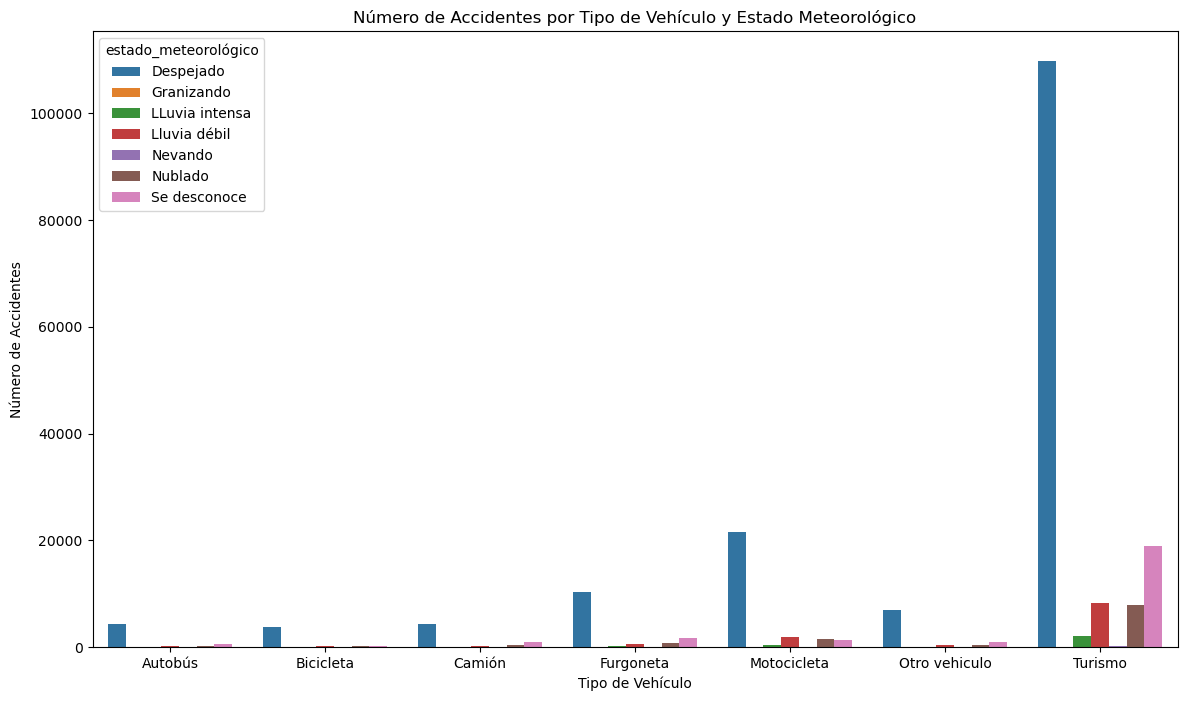

In [18]:
# Objetivo 9 --- Para cada tipo de vehículo muestra visualmente el número de accidentes en función del estado meteorológico. 

type_accident_state_climate = mergeDataSets[['tipo_vehiculo', 'estado_meteorológico']]
type_accident_state_climate = type_accident_state_climate.groupby(['tipo_vehiculo', 'estado_meteorológico']).size().reset_index(name='num_accidents')
plt.figure(figsize=(14, 8))
sns.barplot(x='tipo_vehiculo', y='num_accidents', hue='estado_meteorológico', data=type_accident_state_climate)
plt.title('Número de Accidentes por Tipo de Vehículo y Estado Meteorológico')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Accidentes')
plt.show()

In [19]:
# Objetivo 10 --- Agrupar por número de expediente y contar tipos distintos de vehículos
df_expedient = mergeDataSets.groupby('num_expediente')['tipo_vehiculo'].nunique().reset_index(name='num_tipos_vehiculos')
expedients_5_plus_vehicles = df_expedient[df_expedient['num_tipos_vehiculos'] >= 5]['num_expediente']
expedients_5_plus_vehicles

65620    2022S022123
Name: num_expediente, dtype: object

In [20]:
# Cuántos números de expediente aparecen?
num_expedients = len(expedients_5_plus_vehicles)
# Solo aparece un número de expediente con 5 o mas vehículos implicados

# ¿Qué cantidad de implicados hay en cadaexpediente? 65620 implicados

# ¿Qué tipos de vehículos diferentes aparecen encada número de expediente?
types_vehicles_by_expedient = mergeDataSets[mergeDataSets['num_expediente'].isin(expedients_5_plus_vehicles)].groupby('num_expediente')['tipo_vehiculo'].unique()
types_vehicles_by_expedient

# Los tipos de vehiculos implicados son Camión, Furgoneta, Motocicleta y Otro vehículo

num_expediente
2022S022123    [Camión, Furgoneta, Motocicleta, Otro vehiculo...
Name: tipo_vehiculo, dtype: object

Objetivo 11 --- Mostrar gráficamente las horas mas peligrosas de Madrid

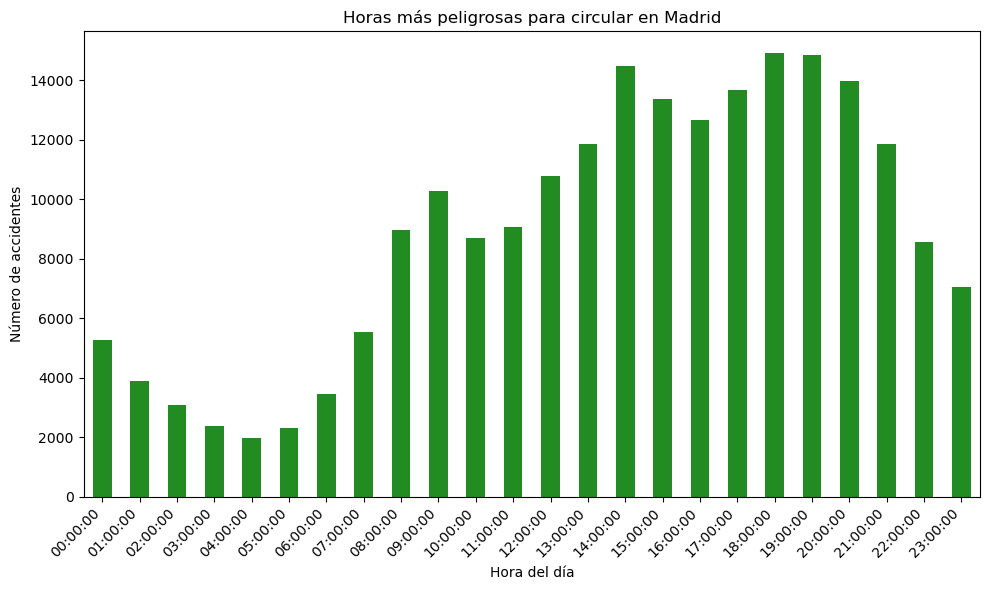

In [21]:
mergeDataSets.loc[:, 'hora'] = mergeDataSets['hora'].apply(lambda x: x.replace(minute=0, second=0))

# Cuenta la frecuencia de cada hora
frequency_hours = mergeDataSets['hora'].value_counts().sort_index()

# Grafica las horas más peligrosas
plt.figure(figsize=(10, 6))
frequency_hours.plot(kind='bar', color='forestgreen')
plt.title('Horas más peligrosas para circular en Madrid')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas
plt.tight_layout()  # Ajusta el diseño para evitar recorte de etiquetas
plt.show()